In [ ]:
### See answers at the bottom of the code.

In [1]:
# pip list

Package                       Version
----------------------------- -----------
alabaster                     0.7.12
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
atomicwrites                  1.4.0
attrs                         21.4.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
bagit                         1.8.1
basemap                       1.3.7
basemap-data                  1.3.2
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleach                        4.1.0
bokeh                         2.4.3
Bottleneck                    1.3.5
brotlipy                      0.7.0
Cartopy                       0.22.0
certifi                       2022.9.14
cffi                          1.15.1
cftime 

In [4]:
# pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy.crs as ccrs

In [100]:
# read in netCDF file
ds = xr.open_dataset('C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/GEOS-CF_AirQuality_20180101_0030z.nc4')

In [101]:
ds

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, lev: 1, time: 1)
Coordinates:
  * lon            (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev            (lev) float64 72.0
  * time           (time) datetime64[ns] 2018-01-01T00:30:00
Data variables:
    CO             (time, lev, lat, lon) float32 ...
    NO2            (time, lev, lat, lon) float32 ...
    O3             (time, lev, lat, lon) float32 ...
    PM25_RH35_GCC  (time, lev, lat, lon) float32 ...
    SO2            (time, lev, lat, lon) float32 ...
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    History:               Original file generated: Mon Dec 24 13:37:28 2018 GMT
    Source:                cak_Icarus-1_0_GCCv12-00-01_v1_010 experiment_id: ...
    Conventions:           CF-1
    Title:                 GEOS CF (Composition Forecast)
    Institution:           NASA Global Modeling and Assimilation Office
    ...                    ...
    DataResolution:        0.25 x 0.25
    LongName:              GEOS CF 2d time-averaged air quality concentration...
    ShortName:             CF01Raqc_1hrT_g1440x721_V1
    Comment:               GMAO filename: c360_GEOS-CF.chm_tavg_1hr_g1440x721...
    Filename:              GEOS-CF.v01.rpl.aqc_tavg_1hr_g1440x721_v1.20180101...
    GranuleID:             GEOS-CF.v01.rpl.aqc_tavg_1hr_g1440x721_v1.20180101...

In [102]:
O3 = ds.O3


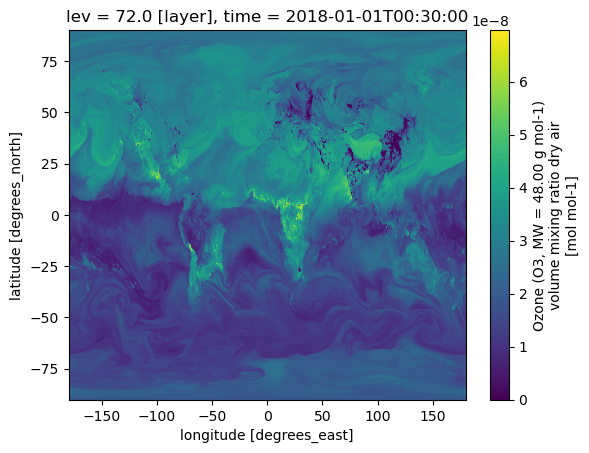

In [5]:
O3.plot() # plot out data without map of world

In [103]:
O3ppb = ds.O3 * 1e9 # convert to ppb

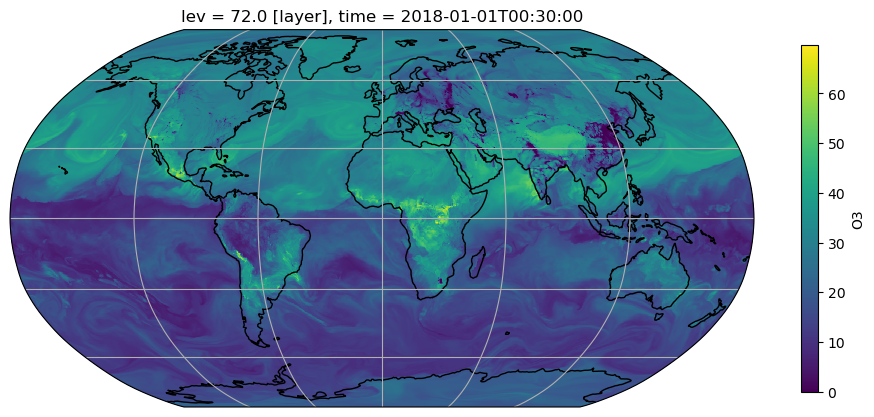

In [19]:
#Plot the map
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=ccrs.Robinson())
O3ppb.plot(ax=ax, transform=ccrs.PlateCarree(), 
        cbar_kwargs={'shrink': 0.5}) # This line just makes the axis smaller
ax.coastlines()
ax.gridlines()

In [104]:
print(O3ppb.max()) # max O3 is 69.73278046 ppb
print(O3ppb.min()) # min O3 is 0

<xarray.DataArray 'O3' ()>
array(69.73278046)
<xarray.DataArray 'O3' ()>
array(0.)


In [107]:
O3ppb.where(O3ppb == O3ppb.max(), drop = True) # lat= 34.5, lon= -118.8

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 4, lon: 8)>
array([[[[nan, nan, nan, nan, nan,  0.,  0., nan],
         [nan, nan, nan, nan, nan, nan,  0.,  0.],
         [ 0., nan,  0.,  0.,  0., nan, nan, nan],
         [nan,  0.,  0.,  0.,  0., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [112]:
O3ppb.where(O3ppb == O3ppb.min(), drop = True)[0,0,:,:]

<xarray.DataArray 'O3' (lat: 4, lon: 8)>
array([[nan, nan, nan, nan, nan,  0.,  0., nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.],
       [ 0., nan,  0.,  0.,  0., nan, nan, nan],
       [nan,  0.,  0.,  0.,  0., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 38.5 38.75 39.0 39.25 39.5 73.25 73.5 73.75
  * lat      (lat) float64 53.0 53.25 55.75 56.0
    lev      float64 72.0
    time     datetime64[ns] 2018-01-01T00:30:00

In [115]:
# Lat, lon of LA is 34.0549, -118.2426
O3ppb.sel(lat=[34.0549], lon=[-118.2426], method="nearest")

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[45.401974]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -118.2
  * lat      (lat) float64 34.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [116]:
# Lat, lon of Hawaii is 19.8987, -155.6659
O3ppb.sel(lat=[19.8987], lon=[-155.6659], method="nearest")

<xarray.DataArray 'O3' (time: 1, lev: 1, lat: 1, lon: 1)>
array([[[[38.35885]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -155.8
  * lat      (lat) float64 20.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2018-01-01T00:30:00

In [ ]:
# Answer questions
# ii.a. O3 is high in central America, and in the southern half of Africa. 
# ii.b. O3 is highest at (34.5, -118.8). 
# ii.c. O3 is lowest over the southern oceans and eastern China.
# ii.d. O3 is lowest at the following longitudes- 38.5, 38.75, 39, 39.25, 39.5, 73.25, 73.5, 73.75, and following latitudes: 53, 53.25, 55.75, 56.
# ii.e. O3 at Los Angeles is 45.401974 ppb.
# ii.f. O3 at Hawaii is 38.35885 ppb.